# **Heirarichal Clustering**
Heirarichal clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:
1. **Agglomerative**: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
2. **Divisive**: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In [17]:
# import libraries for heirarichal clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs

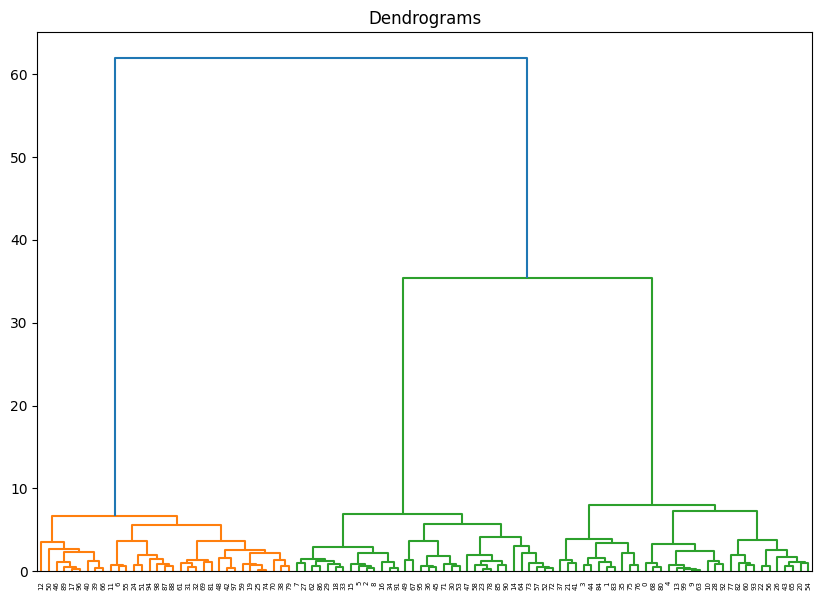

In [18]:
# create a dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=3, random_state=0)

# clustering
clustering = AgglomerativeClustering(n_clusters=11, metric='euclidean', linkage='ward')
clustering.fit(X)

# plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

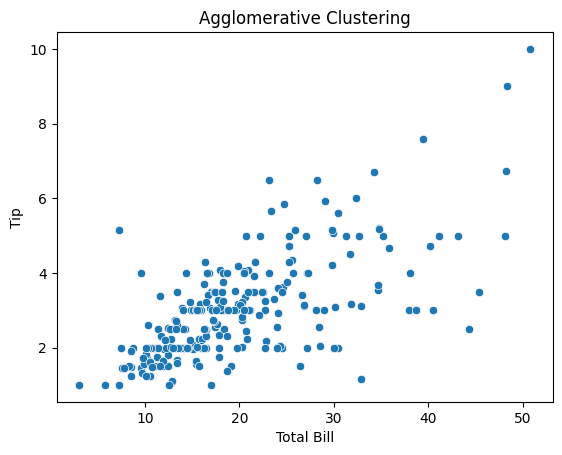

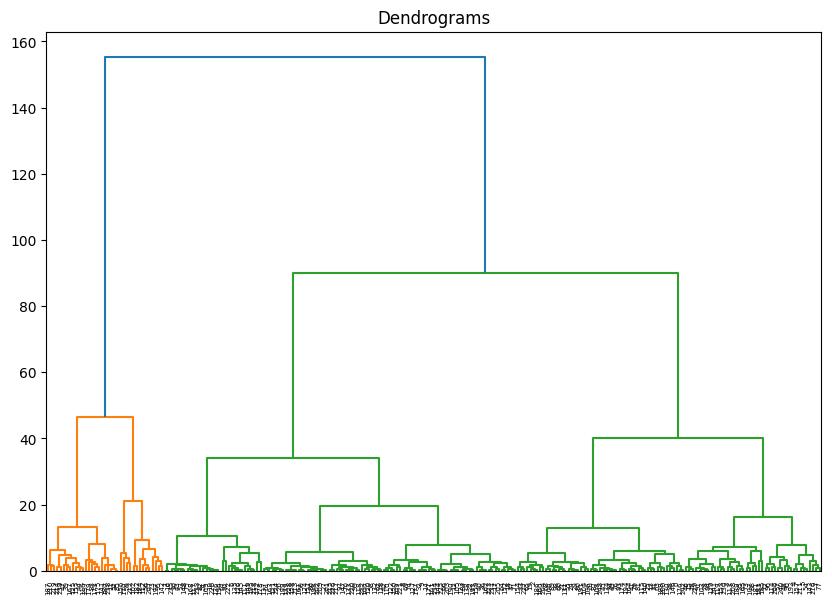

In [19]:
df = sns.load_dataset('tips')

X = df[['total_bill', 'tip', 'size']]

# clustering
clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clustering.fit(X)

# add cluster labels to the dataframe
df['cluster'] = clustering.labels_

# visualize the clusters
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Agglomerative Clustering')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

# plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

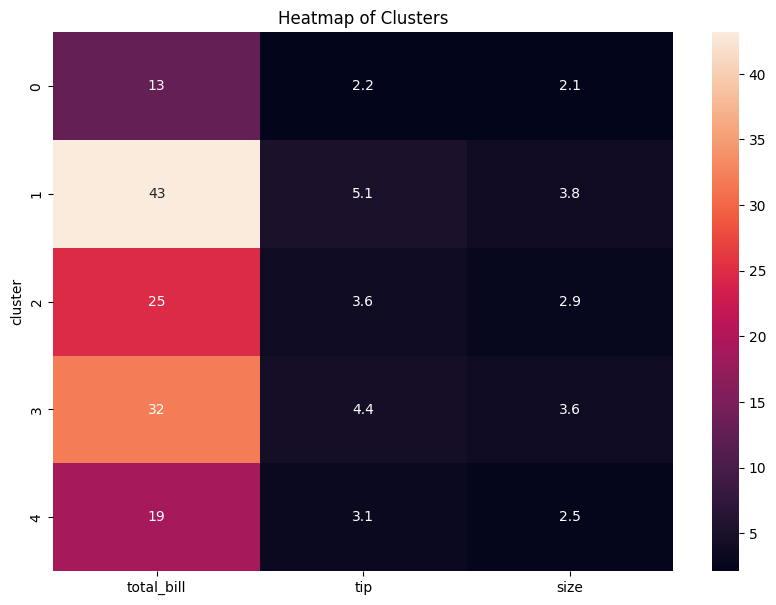

In [24]:
# Heatmap of the clusters to see the relationship of total bill, tip and size wrt samples
plt.figure(figsize=(10, 7))
sns.heatmap(df.groupby('cluster')[['total_bill', 'tip', 'size']].mean(), annot=True)
plt.title('Heatmap of Clusters')
plt.show()

In [27]:
# evaluation metrics for hierarchical clustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Using the dataset and clustering from cell index 3
silhouette = silhouette_score(X, clustering.labels_)
print(f'Silhouette Score: {silhouette}')

# Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(X, clustering.labels_)
print(f'Davies-Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.4066646848832608
Davies-Bouldin Score: 0.6809562562329429
